### **Read data**

In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

#data_root = './dataset'
#data_path = os.path.join(data_root, 'churn_data_clean.csv')

#df = pd.read_csv(data_path)
df = pd.read_csv('churn_data_clean.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [111]:
df.shape

(10348, 27)

### **Split Data**
Split data into training, validation, testing set with ratio 7:1:2

In [112]:
X = df.loc[:, df.columns != 'Churn'] # Features
y = df.loc[:, df.columns == 'Churn'] # Target
print(X.shape)
print(y.shape)

(10348, 26)
(10348, 1)


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (7243, 1)
Validation set:  (1035, 1)
Testing set:  (2070, 1)


In [114]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1939,1,0,0,1,1,1,0,0,0,0,0,0,0,1,21.050000,21.050000,0,0,1,1,0,0,0,0,0,1
2497,0,0,1,0,4,1,0,0,0,0,0,0,0,0,19.600000,93.450000,0,0,1,1,0,0,0,0,0,1
5222,0,0,0,0,8,1,1,1,1,1,0,0,0,1,65.500000,573.150000,1,0,0,1,0,0,1,0,0,0
7482,1,0,0,0,3,1,0,0,0,0,0,0,0,1,70.067047,233.635071,0,1,0,1,0,0,0,0,1,0
229,0,0,1,1,47,1,1,1,1,0,1,1,1,1,85.300000,4107.250000,1,0,0,0,0,1,0,1,0,0
4876,1,0,0,0,10,1,0,1,1,1,0,1,1,1,104.400000,1081.450000,0,1,0,1,0,0,0,0,1,0
2914,1,0,0,0,32,1,0,0,0,0,0,1,1,1,64.850000,2010.950000,1,0,0,0,1,0,1,0,0,0
68,0,0,1,1,50,1,0,0,0,0,0,0,0,0,20.150000,930.900000,0,0,1,0,0,1,1,0,0,0
7832,1,0,1,0,66,1,1,0,1,1,1,1,1,1,106.060504,7139.740286,0,1,0,0,1,0,0,0,1,0
7494,0,1,0,0,52,1,1,0,1,0,0,1,0,1,83.370580,4349.291005,0,1,0,1,0,0,0,0,1,0


In [115]:
X_val.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5853,1,0,1,0,62,1,1,1,1,0,0,0,1,0,96.100000,6001.450000,0,1,0,0,1,0,0,0,1,0
4882,0,0,0,0,66,0,0,1,1,1,1,1,1,1,62.500000,4136.400000,1,0,0,0,0,1,1,0,0,0
2414,0,0,1,0,25,1,0,0,0,0,0,0,0,1,20.200000,507.900000,0,0,1,0,1,0,1,0,0,0
5642,0,0,0,0,20,1,0,0,0,0,0,0,0,0,19.500000,403.150000,0,0,1,0,1,0,0,0,0,1
8623,1,0,0,0,2,1,0,0,0,0,0,0,0,1,44.767381,94.317657,1,0,0,1,0,0,0,0,1,0
1128,1,0,0,0,27,1,0,0,0,0,0,0,0,1,19.400000,529.800000,0,0,1,1,0,0,0,0,1,0
6990,1,0,1,0,36,1,0,1,0,0,0,1,1,1,93.600000,3366.050000,0,1,0,1,0,0,0,0,1,0
4849,1,0,0,0,41,0,0,0,0,1,0,1,1,1,51.350000,2075.100000,1,0,0,0,1,0,0,0,1,0
5744,1,1,1,0,40,1,0,0,0,0,0,0,1,0,55.800000,2283.300000,1,0,0,0,1,0,0,0,1,0
9067,1,0,0,0,55,1,0,1,1,0,0,0,0,1,40.541898,2106.960062,1,0,0,1,0,0,0,0,1,0


In [116]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,1,0,0,0,47,1,1,0,0,1,0,1,1,1,93.853385,4506.133022,0,1,0,1,0,0,0,0,1,0
4593,0,0,0,0,11,1,0,0,0,0,0,0,0,0,20.300000,246.300000,0,0,1,1,0,0,1,0,0,0
5379,0,0,1,0,56,1,1,1,0,0,0,1,1,1,98.000000,5270.600000,0,1,0,0,1,0,0,0,1,0
8918,1,0,0,0,8,1,0,0,0,0,0,0,0,1,74.938341,631.572940,0,1,0,1,0,0,0,0,1,0
6448,1,0,0,0,58,1,1,0,0,1,1,1,1,1,104.650000,6219.600000,0,1,0,0,1,0,0,0,1,0
6060,0,1,0,0,8,1,0,0,1,0,0,1,0,1,87.100000,713.600000,0,1,0,1,0,0,0,0,1,0
850,0,0,1,1,72,1,1,1,1,1,1,1,1,1,115.800000,8476.500000,0,1,0,0,0,1,1,0,0,0
713,0,0,0,1,14,1,1,1,0,0,1,0,0,1,86.000000,1164.050000,0,1,0,1,0,0,0,0,0,1
8661,1,0,0,0,3,0,0,0,0,0,0,0,0,0,27.602254,74.301170,1,0,0,1,0,0,0,0,1,0
4438,1,0,1,1,51,1,1,0,0,0,0,0,0,1,24.950000,1222.250000,0,0,1,0,0,1,0,0,0,1


### **Normalization**

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

### **Logistic Regression**

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

logistic_classifier = LogisticRegression()

# Measure the training time of the model
t0 = time.time()

logistic_classifier.fit(X_train, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

Training time: 0.30 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       524
           1       0.78      0.83      0.80       511

    accuracy                           0.80      1035
   macro avg       0.80      0.80      0.80      1035
weighted avg       0.80      0.80      0.80      1035



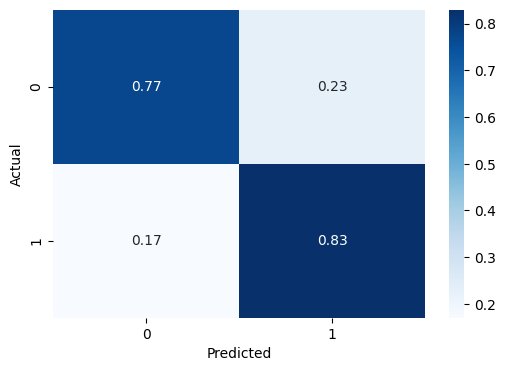

In [119]:
y_val_pred = logistic_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_pred))
confmat = confusion_matrix(y_val, y_val_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(confmat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [120]:
logistic_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### *Hyper-parameters Tuning for Logistic Regression*

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l2']
}
logistic_grid = GridSearchCV(pipe, param_grid, cv=5)
logistic_grid.fit(X_train, y_train.values.ravel())


print(logistic_grid.best_params_)

{'logisticregression__C': 1000, 'logisticregression__penalty': 'l2'}


#### **Tuned Logistic Regression**

In [122]:
best_C = logistic_grid.best_params_.get('logisticregression__C')
best_penalty = logistic_grid.best_params_.get('logisticregression__penalty')

logistic_tuned = LogisticRegression(C=best_C, penalty=best_penalty)

t0 = time.time()

logistic_tuned.fit(X_train, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

Training time: 0.30 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8029
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       524
           1       0.78      0.83      0.81       511

    accuracy                           0.80      1035
   macro avg       0.80      0.80      0.80      1035
weighted avg       0.80      0.80      0.80      1035



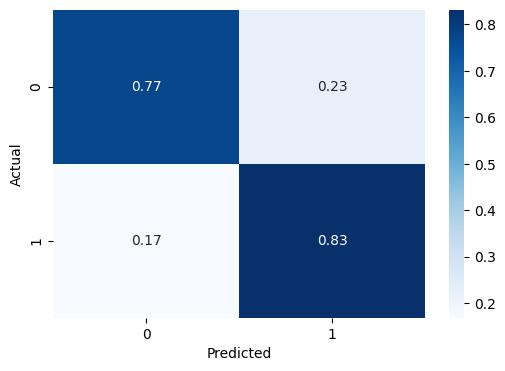

In [123]:
y_val_tune_pred = logistic_tuned.predict(X_val)
accuracy_tune = accuracy_score(y_val, y_val_tune_pred)

print(f'Accuracy: {accuracy_tune:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_tune_pred))
confmat_tune = confusion_matrix(y_val, y_val_tune_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(confmat_tune, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **PCA**
Choose the number of components for which the cumulative explained variance exceeds a threshold of 0.95 (95%).

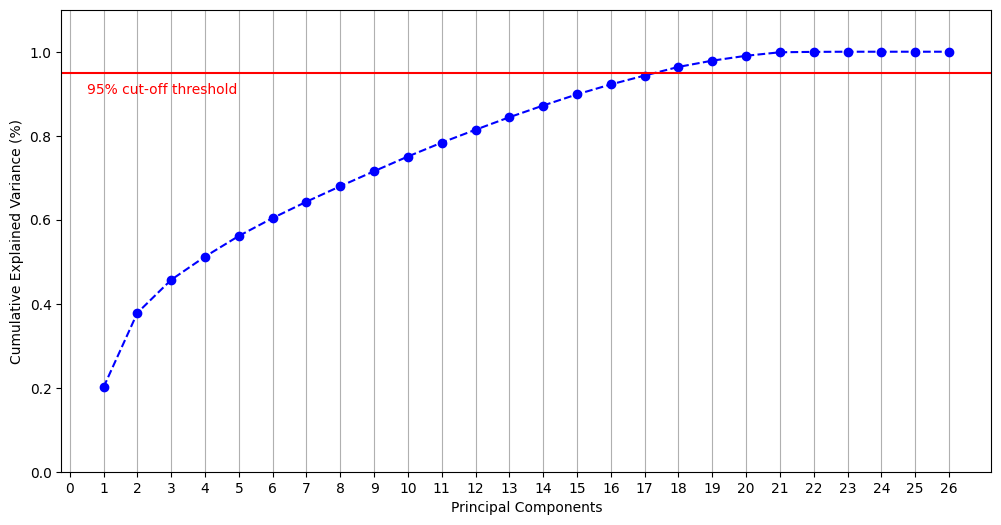

In [124]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train_normalized)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 27, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Principal Components')
plt.xticks(np.arange(0, 27, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative Explained Variance (%)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red')

ax.grid(axis='x')
plt.show()

In [125]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_val_pca = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

### **Logistic Regression with PCA**

Accuracy: 0.7961
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       524
           1       0.77      0.83      0.80       511

    accuracy                           0.80      1035
   macro avg       0.80      0.80      0.80      1035
weighted avg       0.80      0.80      0.80      1035



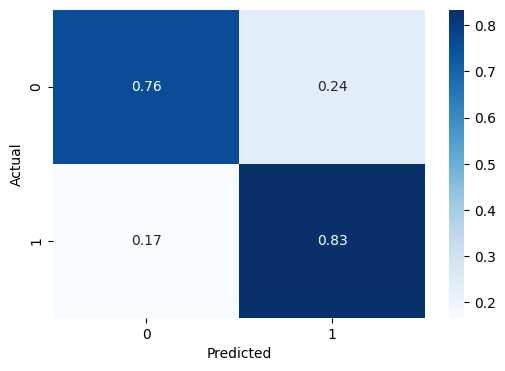

In [127]:
y_val_logistic_pca_pred = logistic_classifier.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_val_logistic_pca_pred)

print(f'Accuracy: {accuracy_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_logistic_pca_pred))
logistic_pca_confmat = confusion_matrix(y_val, y_val_logistic_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(logistic_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### *Hyper-parameters Tuning Logistic Regression with PCA*

In [128]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l2']
}
logistic_grid = GridSearchCV(pipe, param_grid, cv=5)
logistic_grid.fit(X_train_pca, y_train.values.ravel())


print(logistic_grid.best_params_)

{'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}


#### **Tuned Logistic Regression with PCA**

In [129]:
best_C = logistic_grid.best_params_.get('logisticregression__C')
best_penalty = logistic_grid.best_params_.get('logisticregression__penalty')

logistic_tuned = LogisticRegression(C=best_C, penalty=best_penalty)

t0 = time.time()

logistic_tuned.fit(X_train_pca, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

Training time: 0.06 s


Accuracy: 0.8029
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       524
           1       0.77      0.83      0.80       511

    accuracy                           0.80      1035
   macro avg       0.80      0.80      0.80      1035
weighted avg       0.80      0.80      0.80      1035



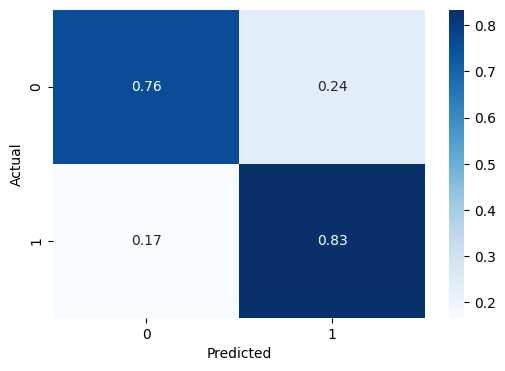

In [130]:
y_val_logistic_tune_pca_pred = logistic_tuned.predict(X_val_pca)
accuracy_tune_pca = accuracy_score(y_val, y_val_tune_pred)

print(f'Accuracy: {accuracy_tune_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_logistic_tune_pca_pred))
logistic_tune_pca_confmat = confusion_matrix(y_val, y_val_logistic_tune_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(logistic_tune_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()